In [32]:
import numpy as np
import matplotlib.pyplot as plt

d0 = 5/2
L0 = 50
S = round(np.pi* d0**2, 2)
print(S)

19.63


In [33]:
#столбец 0 - ход деформирования
#столбец 1 - сила деформирования
#[x, y] - x - строка, y - столбец
load_stroke_array = np.loadtxt ('load_data.txt', delimiter = '\t')

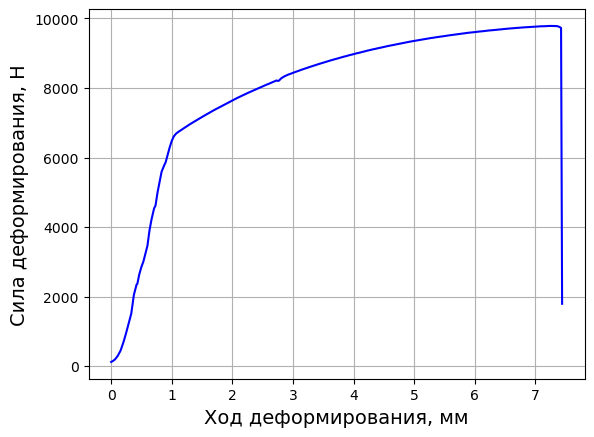

In [34]:
#Построение кривой деформации
plt.figure(1)
plt.plot (load_stroke_array[:, 1], load_stroke_array[:, 2], '-', color = 'blue')
plt.xlabel ('Ход деформирования, мм', fontsize = 14)
plt.ylabel ('Сила деформирования, Н', fontsize = 14)
plt.grid()

In [35]:
#Расчет инженерного напряжения
eng = np.array(np.round([(load_stroke_array[:, 1]/L0)*100, load_stroke_array[:, 2]/S], 4))
eng = eng.T

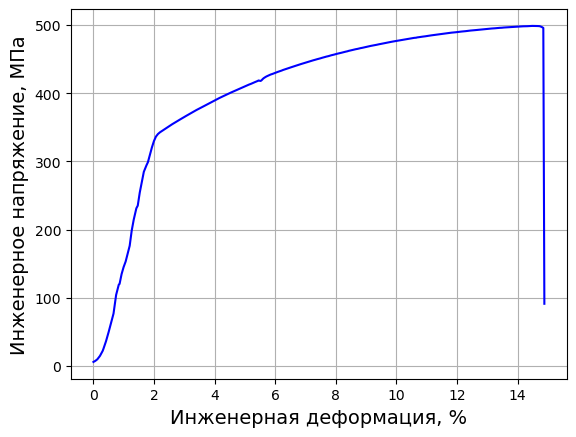

In [36]:
#Построение диаграммы деформации
plt.figure(2)
plt.plot (eng[:, 0], eng[:, 1], '-', color = 'blue')
plt.xlabel ('Инженерная деформация, %', fontsize = 14)
plt.ylabel ('Инженерное напряжение, МПа', fontsize = 14)
plt.grid()

In [37]:
#Расчет истинного напряжения
true = np.array([np.log(1+eng[:, 0]/100), (eng[:, 1]*(1+eng[:, 0]/100))])
true = true.T

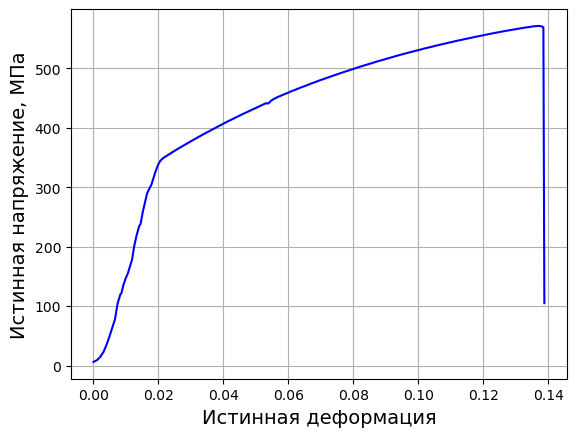

In [38]:
#Построение диаграммы истинной деформации
plt.figure(3)
plt.plot (true[:, 0], true[:, 1], '-', color = 'blue')
plt.xlabel ('Истинная деформация', fontsize = 14)
plt.ylabel ('Истинная напряжение, МПа', fontsize = 14)
plt.grid()

In [39]:
#Сохранение txt файлов со значениями напряжений и деформаций
eng_txt = np.column_stack((load_stroke_array[:, 0], eng))
true_txt = np.column_stack((load_stroke_array[:, 0], true))
np.savetxt('eng_strain_and_stress.txt', eng_txt, delimiter = '\t', fmt = '%.4f', header = 'Время\tИнженерная деформация\tИнженерное напряжение')
np.savetxt('true_strain_and_stress.txt', true_txt, delimiter = '\t', fmt = '%.4f', header = 'Время\tИнженерная деформация\tИнженерное напряжение')